In [2]:
import pandas as pd             #type: ignore
import numpy as np              #type: ignore
import matplotlib.pyplot as plt         #type: ignore
import seaborn as sns                   #type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix       #type: ignore
from sklearn.tree import DecisionTreeClassifier        #type: ignore
from sklearn.preprocessing import StandardScaler       #type: ignore
from sklearn.model_selection import train_test_split   #type: ignore
from tree.metrics import *                                  #type: ignore
%matplotlib inline

In [3]:
"""Load the dataset"""

#Contains the raw accerelometer data(accx,accy,accz)
data= pd.read_csv("data.csv")  

#Contains the raw accerelometer data(accx,accy,accz) and gyro data(gyrox,gyroy,gyroz) and body acceleration data(body_accx,body_accy,body_accz)
full_data= pd.read_csv("full_data.csv") 

Results for decision tree model using raw accelerometer data: 

Accuracy:  0.71

Weighted Average Precision:
  0.71

Weighted Average Recall:
  0.71



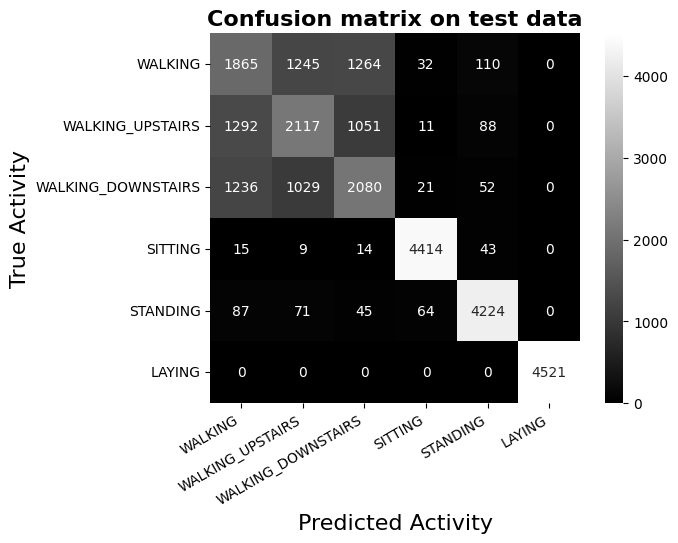

In [4]:
"""Train a decision tree model using the raw accelerometer data"""

X= data.drop(['subject','activity'],axis=1)
y= data['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree_model= DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred= decision_tree_model.predict(X_test)     # a row vector numpy array
y_pred= pd.Series(y_pred)                       # convert to pandas series

acc= accuracy_score(y_pred, y_test)

# prec= [(cls, precision(y_pred,y_test, cls)) for cls in y_pred.unique()]
prec= precision_score(y_test, y_pred, average='weighted')

# rec= [(cls, recall(y_pred,y_test, cls)) for cls in y_test.unique()]
rec= recall_score(y_test, y_pred, average='weighted') 
#average='weighted' Computes recall for each class and takes the weighted mean, where the weights are the number of true instances for each class

confusion_mtx= confusion_matrix(y_test, y_pred)

print("Results for decision tree model using raw accelerometer data: \n")

print("Accuracy: ", f"{acc:.2f}\n")
print("Weighted Average Precision:\n ", f"{prec:.2f}\n")
print("Weighted Average Recall:\n ", f"{rec:.2f}\n")

# Plot the confusion matrix
activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

sns.heatmap(confusion_mtx,annot=True,square=True,cmap="gray",fmt="d",xticklabels=activity_code.keys(), yticklabels=activity_code.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")


*** Feature extraction started ***



*** Feature extraction finished ***
Results for decision tree model using features obtained by TSFEL: 

Accuracy:  0.87

Weighted Average Precision:  0.88

Weighted Average Recall:  0.870370



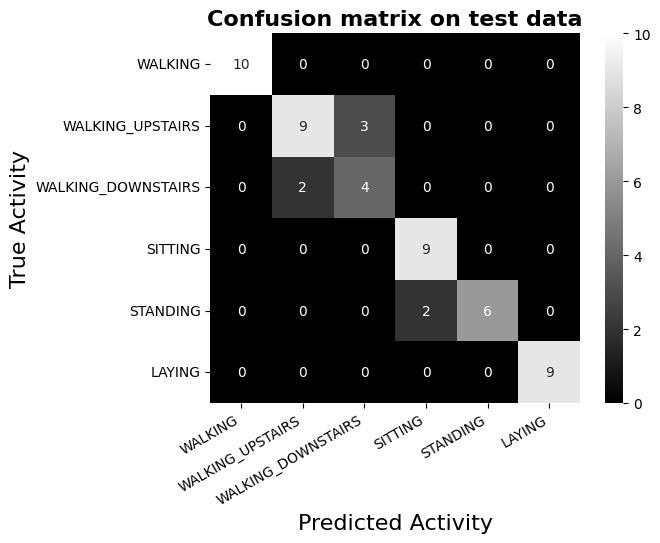

In [5]:
"""Train a decision tree model using the features obtained by TSFEL"""

import tsfel            #type: ignore

df= full_data.drop(['subject','activity'],axis=1)

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()           # If no argument is passed retrieves all available features

# Extract features
tsfel_df = tsfel.time_series_features_extractor(cfg, df, fs=50, window_size=500)    
# Above function receives a time series sampled at 50 Hz, divides into windows of size 500 (i.e. 10 seconds)
# The extracted features contain the statistical values of the time series, such as mean, median, standard deviation, etc. by comparing all windows

"""Training a decision tree model using the features obtained by TSFEL"""
X= tsfel_df

y= data['activity'][1:90000:500]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree_model= DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred= decision_tree_model.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)

precision= precision_score(y_test, y_pred, average='weighted')

recall= recall_score(y_test, y_pred, average='weighted')

confusion_mtx= confusion_matrix(y_test, y_pred)

print("Results for decision tree model using features obtained by TSFEL: \n")

print("Accuracy: ", f"{accuracy:.2f}\n")

print("Weighted Average Precision: ", f"{precision:.2f}\n")

print("Weighted Average Recall: ", f"{recall:2f}\n")

# Plot the confusion matrix
activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

sns.heatmap(confusion_mtx,annot=True,square=True,cmap="gray",fmt="d",xticklabels=activity_code.keys(), yticklabels=activity_code.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")

Results for decision tree model using all the features provided in the dataset: 

Accuracy:  0.83

Weighted Average Precision:  0.83

Weighted Average Recall:  0.828704



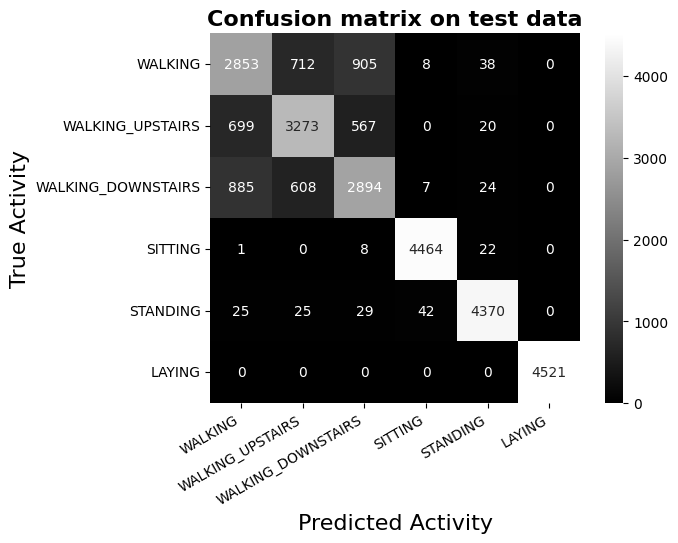

In [6]:
"""Training a decision tree model using all the features provided in the dataset"""

X= full_data.drop(['subject','activity'],axis=1)
y= full_data['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree_model= DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred= decision_tree_model.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)

precision= precision_score(y_test, y_pred, average='weighted')

recall= recall_score(y_test, y_pred, average='weighted')

confusion_mtx= confusion_matrix(y_test, y_pred)

print("Results for decision tree model using all the features provided in the dataset: \n")

print("Accuracy: ", f"{accuracy:.2f}\n")

print("Weighted Average Precision: ", f"{precision:.2f}\n")

print("Weighted Average Recall: ", f"{recall:2f}\n")

# Plot the confusion matrix
activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

sns.heatmap(confusion_mtx,annot=True,square=True,cmap="gray",fmt="d",xticklabels=activity_code.keys(), yticklabels=activity_code.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")


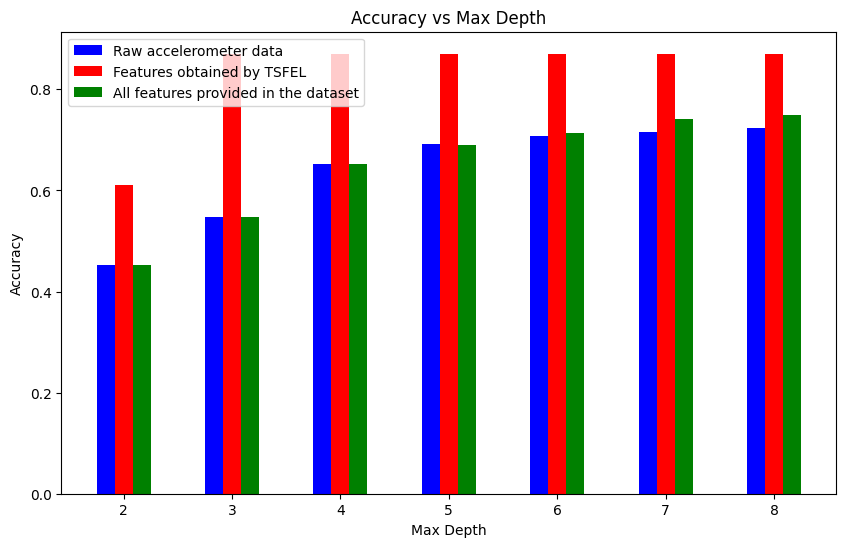

In [7]:
"""Train Decision Tree with varying max depths (2-8) using all above 3 methods"""

depth_range= np.arange(2,9)

"""Train Decision Tree with varying depths (2-8) using raw accelerometer data"""
accuracy_list1= []

X= data.drop(['subject','activity'],axis=1)
y= data['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in depth_range:
    decision_tree_model= DecisionTreeClassifier(max_depth=depth,random_state=42)

    decision_tree_model.fit(X_train, y_train)

    y_pred= decision_tree_model.predict(X_test)

    accuracy= accuracy_score(y_test, y_pred)

    accuracy_list1.append(accuracy)

"""Train Decision Tree with varying depths (2-8) using raw accelerometer data"""
accuracy_list2= []

X= tsfel_df
y= data['activity'][1:90000:500]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in depth_range:
    decision_tree_model= DecisionTreeClassifier(max_depth=depth,random_state=42)

    decision_tree_model.fit(X_train, y_train)

    y_pred= decision_tree_model.predict(X_test)

    accuracy= accuracy_score(y_test, y_pred)

    accuracy_list2.append(accuracy)


"""Train Decision Tree with varying depths (2-8) using all the features provided in the dataset"""
accuracy_list3= []

X= full_data.drop(['subject','activity'],axis=1)
y= full_data['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in depth_range:
    decision_tree_model= DecisionTreeClassifier(max_depth=depth,random_state=42)

    decision_tree_model.fit(X_train, y_train)

    y_pred= decision_tree_model.predict(X_test)

    accuracy= accuracy_score(y_test, y_pred)

    accuracy_list3.append(accuracy)

plt.figure(figsize=(10,6))
wid= 0.166
plt.bar(depth_range-wid, accuracy_list1, width=wid, color='blue', label='Raw accelerometer data')
plt.bar(depth_range, accuracy_list2, width=wid, color='red', label='Features obtained by TSFEL')
plt.bar(depth_range+wid, accuracy_list3, width=wid, color='green', label='All features provided in the dataset')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()

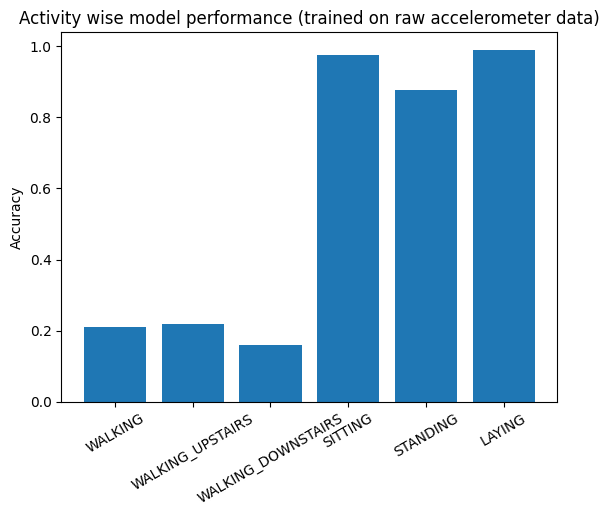

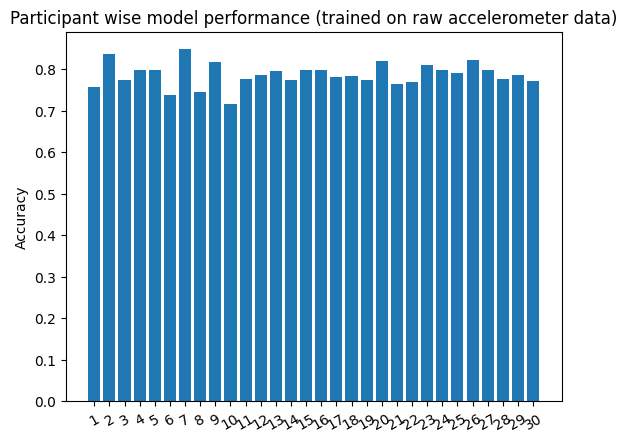

In [8]:
"""Q. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?"""

"""Computing Activity wise model performance (trained on raw accelerometer data)""" 

activity_wise_accuracy= []

activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

for activity, code in activity_code.items():
    df= data[data["activity"]==code]

    X= df.drop(['subject','activity'],axis=1)
    y= df['subject']      # subject is used as target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    decision_tree_model= DecisionTreeClassifier(random_state=42)
    decision_tree_model.fit(X_train, y_train)
    y_pred= decision_tree_model.predict(X_test)

    accuracy= accuracy_score(y_test, y_pred)
    activity_wise_accuracy.append(accuracy)

plt.bar(range(6), activity_wise_accuracy)
plt.xticks(range(6), activity_code.keys(), rotation=30)
plt.ylabel('Accuracy')
plt.title('Activity wise model performance (trained on raw accelerometer data)')
plt.show()


""" computing Participant wise model performance (trained on raw accelerometer data)""" 
participant_wise_accuracy= []

participant_codes= np.unique(data['subject'])

for participant in participant_codes:
    df= data[data["subject"]==participant]

    X= df.drop(['subject','activity'],axis=1)
    y= df['activity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    decision_tree_model= DecisionTreeClassifier(max_depth= 5, random_state=42)
    decision_tree_model.fit(X_train, y_train)
    y_pred= decision_tree_model.predict(X_test)

    accuracy= accuracy_score(y_test, y_pred)
    participant_wise_accuracy.append(accuracy)

plt.bar( range(len(participant_codes)), participant_wise_accuracy)
plt.xticks(range(len(participant_codes)), participant_codes, rotation=30)
plt.ylabel('Accuracy')
plt.title('Participant wise model performance (trained on raw accelerometer data)')
plt.show()

